In [1]:
import pandas as pd
train_df = pd.read_csv('./data/train_set.csv', sep='\t', nrows=100)
print(train_df['label'])

0      2
1     11
2      3
3      2
4      3
      ..
95     7
96     1
97     2
98     2
99     4
Name: label, Length: 100, dtype: int64


In [2]:
train_df.head()

,label,text
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...



# 句子长度分析

在赛题数据中每行句子的字符使用空格进行隔开，所以可以直接统计单词的个数来得到每个句子的长度。统计并如下

In [4]:
%matplotlib  inline
train_df['text_len'] = train_df['text'].apply(lambda x: len(x.split(' ')))
print(train_df['text_len'].describe())

count     100.000000
mean      872.320000
std       923.138191
min        64.000000
25%       359.500000
50%       598.000000
75%      1058.000000
max      7125.000000
Name: text_len, dtype: float64


Text(0.5, 1.0, 'Histogram of char count')

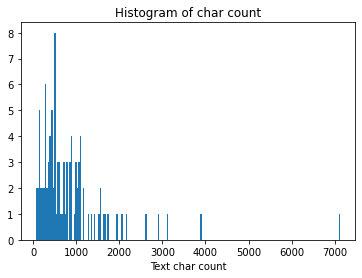

In [7]:
_ = plt.hist(train_df['text_len'], bins=200)
plt.xlabel('Text char count')
plt.title("Histogram of char count")

Text(0.5, 1.0, 'Histogram of char count')

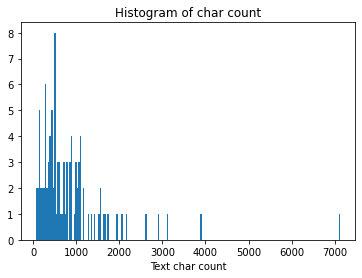

In [16]:
_ = plt.hist(train_df['text_len'], bins=200)
plt.xlabel('Text char count')
plt.title("Histogram of char count")

Text(0, 0.5, 'count')

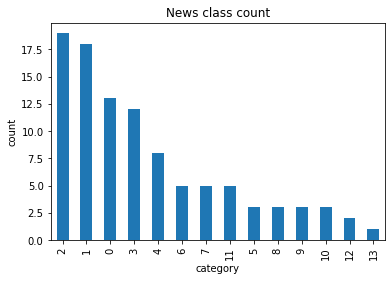

In [17]:
train_df['label'].value_counts().plot(kind='bar')
plt.title('News class count')
plt.xlabel("category")
plt.ylabel("count")

In [21]:
from collections import Counter
all_lines = ' '.join(list(train_df['text']))
word_count = Counter(all_lines.split(' '))
word_count = sorted(word_count.items(), key=lambda d:d[1], reverse = True)

print(len(word_count))

print(word_count[0])
print(word_count[1])
print(word_count[2])

print(word_count[-1])

2405
('3750', 3702)
('648', 2423)
('900', 1602)
('5034', 1)


In [22]:
from collections import Counter
lines_list = list(train_df['text'])
for line in lines_list:
    word_count = Counter(line.split(' '))
    word_count = sorted(word_count.items(), key=lambda d:d[1], reverse = True)
  

('3750', 64)
('3750', 25)
('3750', 27)
('3750', 86)
('3055', 12)
('3317', 27)
('2465', 11)
('3750', 43)
('6220', 59)
('3750', 46)
('3750', 34)
('3370', 30)
('465', 15)
('1641', 12)
('1633', 32)
('3750', 27)
('3750', 10)
('3750', 55)
('2367', 24)
('648', 19)
('648', 64)
('648', 31)
('3370', 32)
('3750', 30)
('4464', 19)
('3750', 18)
('3750', 16)
('4411', 17)
('3750', 41)
('3750', 31)
('4464', 49)
('3154', 38)
('3750', 43)
('3750', 17)
('3750', 28)
('4464', 65)
('3750', 166)
('2210', 45)
('3750', 32)
('2109', 3)
('3750', 168)
('3750', 86)
('2119', 23)
('3750', 30)
('3750', 21)
('3750', 48)
('3750', 48)
('3750', 37)
('3750', 29)
('3750', 70)
('3750', 12)
('3700', 6)
('3659', 10)
('3750', 21)
('3750', 5)
('3750', 58)
('3750', 78)
('3750', 18)
('3750', 25)
('648', 26)
('3750', 21)
('648', 28)
('5678', 13)
('3750', 14)
('3809', 24)
('3750', 91)
('3750', 21)
('3750', 42)
('3750', 29)
('3750', 105)
('3750', 20)
('3750', 340)
('3351', 29)
('3750', 29)
('151', 6)
('3750', 65)
('2465', 71)
('3750

In [1]:
# Count Vectors + RidgeClassifier

import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import f1_score

train_df = pd.read_csv('./data/train_set.csv', sep='\t', nrows=15000)

vectorizer = CountVectorizer(max_features=3000)
train_test = vectorizer.fit_transform(train_df['text'])

clf = RidgeClassifier()
clf.fit(train_test[:10000], train_df['label'].values[:10000])

val_pred = clf.predict(train_test[10000:])
print(f1_score(train_df['label'].values[10000:], val_pred, average='macro'))
# 0.7421

0.7421821524540311


In [43]:
# TF-IDF +  RidgeClassifier

import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score

train_df = pd.read_csv('./data/train_set.csv', sep='\t', nrows=15000)

tfidf = TfidfVectorizer(ngram_range=(1,4), max_features=3000)

train_test = tfidf.fit_transform(train_df['text'])

clf = RidgeClassifier()
clf.fit(train_test[:10000], train_df['label'].values[:10000])

val_pred = clf.predict(train_test[10000:])
print(f1_score(train_df['label'].values[10000:], val_pred, average='macro'))
# 0.87

0.8738210287555335


In [6]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

texts=["orange banana apple grape","banana apple apple","grape", 'orange apple']
cv = TfidfVectorizer()
# cv_fit 是一种稀疏矩阵
cv_fit=cv.fit_transform(texts)
print(cv.vocabulary_)
print(cv_fit)
print(cv_fit.toarray())


{'orange': 3, 'banana': 1, 'apple': 0, 'grape': 2}
  (0, 2)	0.5230350301866413
  (0, 0)	0.423441934145613
  (0, 1)	0.5230350301866413
  (0, 3)	0.5230350301866413
  (1, 0)	0.8508160982744233
  (1, 1)	0.5254635733493682
  (2, 2)	1.0
  (3, 0)	0.6292275146695526
  (3, 3)	0.7772211620785797
[[0.42344193 0.52303503 0.52303503 0.52303503]
 [0.8508161  0.52546357 0.         0.        ]
 [0.         0.         1.         0.        ]
 [0.62922751 0.         0.         0.77722116]]


In [41]:

# 0.87

In [39]:
# Count Vectors + RidgeClassifier

import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import f1_score

all_data_size = 200
train_data_size = 160
test_data_size = all_data_size - train_data_size

train_df = pd.read_csv('./data/train_set.csv', sep='\t', nrows=all_data_size)

vectorizer = CountVectorizer(max_features=300)
train_test = vectorizer.fit_transform(train_df['text'])

print(train_df['label'].values[train_data_size:])

clf = RidgeClassifier()
clf.fit(train_test[:train_data_size], train_df['label'].values[:train_data_size])

val_pred = clf.predict(train_test[train_data_size:])
print(val_pred)
print(f1_score(train_df['label'].values[train_data_size:], val_pred, average='macro'))
# 0.28

# svm
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=30, gamma=0.5, decision_function_shape='ovo')
clf.fit(train_test[:train_data_size], train_df['label'].values[:train_data_size])
val_pred = clf.predict(train_test[train_data_size:])
print(val_pred)
print(f1_score(train_df['label'].values[train_data_size:], val_pred, average='macro'))


from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors = 13 , weights='distance')
clf.fit(train_test[:train_data_size], train_df['label'].values[:train_data_size])
val_pred = clf.predict(train_test[train_data_size:])
print(val_pred)
print(f1_score(train_df['label'].values[train_data_size:], val_pred, average='macro'))


[11  0  4  5 10  1  0  8 11  3  3  3  2  3  0  1  1  9  1  2  0  7  8  1
  3  3  7  2  1  1  5  1  0  0  1  4  0  1  2  0]
[ 4  2  4  5 10  2  0  2  4  3  3  3  4  2  9  0  1  1  1  5  9  7  1  0
  3  3  4  4  1  3  4  1  1  1  1  1  0  2  2  0]
0.39852369852369857
[ 3  1  4  5 10  0 12 12  3  3  4  3  4  3  0  1  1  3  1  2 10  7  3  1
  3  3  7  2  1  1  5  1  0  1  1  4  0  1  2  0]
0.5274725274725275
[ 3  1  1  2  1  1  0  0  3  3  4  3  1  0  0  1  1  1  1  2 10  1  3  1
  3  3  1  2  1  1  2  1  1  1  1  1  1  1  2  2]
0.19944356718550268


In [44]:
# Count Vectors + RidgeClassifier

import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import f1_score

all_data_size = 15
train_data_size = 10
test_data_size = all_data_size - train_data_size

train_df = pd.read_csv('./data/train_set.csv', sep='\t', nrows=all_data_size)

vectorizer = CountVectorizer(max_features=3000)
train_test = vectorizer.fit_transform(train_df['text'])


clf = RidgeClassifier()
clf.fit(train_test[:train_data_size], train_df['label'].values[:train_data_size])
val_pred = clf.predict(train_test[train_data_size:])

print(f1_score(train_df['label'].values[train_data_size:], val_pred, average='macro'))
# 0.28

# svm
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=30, gamma=0.5, decision_function_shape='ovo')
clf.fit(train_test[:train_data_size], train_df['label'].values[:train_data_size])
val_pred = clf.predict(train_test[train_data_size:])

print(f1_score(train_df['label'].values[train_data_size:], val_pred, average='macro'))


from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors = 13 , weights='distance')
clf.fit(train_test[:train_data_size], train_df['label'].values[:train_data_size])
val_pred = clf.predict(train_test[train_data_size:])

print(f1_score(train_df['label'].values[train_data_size:], val_pred, average='macro'))


0.7421821524540311
0.8321180641074305
0.6520716080703268


In [1]:
import numpy as np
a = np.array([1, 2, 3, 4, 5])
a = a/2
a

array([0.5, 1. , 1.5, 2. , 2.5])

In [3]:
import pandas as pd
train_df = pd.read_csv('./data/train_set.csv', sep='\t', nrows=100)
from collections import Counter
all_lines = ' '.join(list(train_df['text']))
word_count = Counter(all_lines.split(" "))
word_count = sorted(word_count.items(), key=lambda d:d[1], reverse = True)

print(len(word_count))

print(word_count[0][0])

print(word_count[-1])

2405
3750
('5034', 1)
